In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_max a_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e

j = Joint(5_000, 50_000)
       
   

In [45]:
from trajectory.gsolver import * 
accel_xt(0, 500, j.a_max), accel_xt(0, 1000, j.a_max),  accel_xt(0, 2000, j.a_max), 

((2.5, 0.01), (10.0, 0.02), (40.0, 0.04))

In [24]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

b = sl[0][0]
print(b.t)
ss = b.iter_steps()

l= list(ss)
len(l)


0.30006518899294243


75017

<AxesSubplot:xlabel='t'>

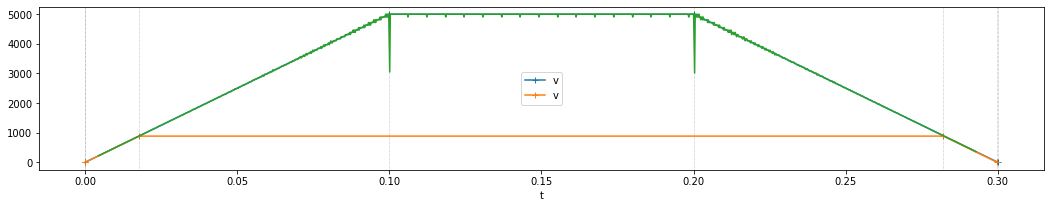

In [29]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

ax = sl.plot()

b = sl[0][0]
t = pd.Series(list(s[1] for s in b.iter_steps()))
#ax = (t.rolling(500).mean()*(250_000)).plot(figsize=(20,3))

# Calculate velocity
x = t.to_frame('step')
x['t'] = 4/1e6
x['t'] = x.t.cumsum()
x = x[x.step==1]
v = (1/x.t.diff()).to_frame('v')
x = x.join(v)
x = x[x.v < 20_000]
x.set_index('t').v.plot(ax=ax)



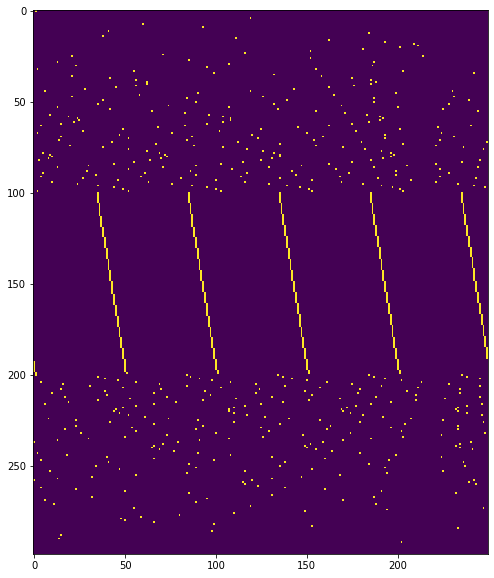

In [50]:
l = 299
last = l*(len(t)//l)
img = t.values[:last].reshape( (l,-1) )

from matplotlib import pyplot as plt
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img, interpolation='nearest')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


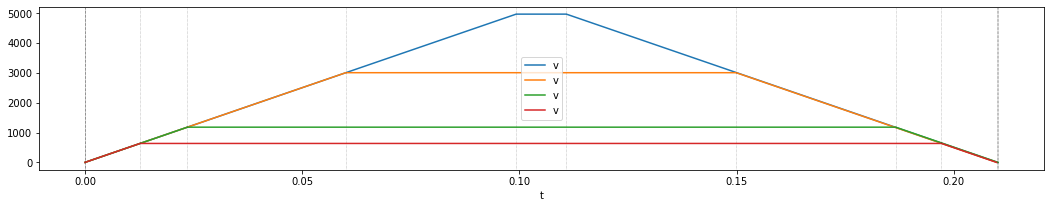

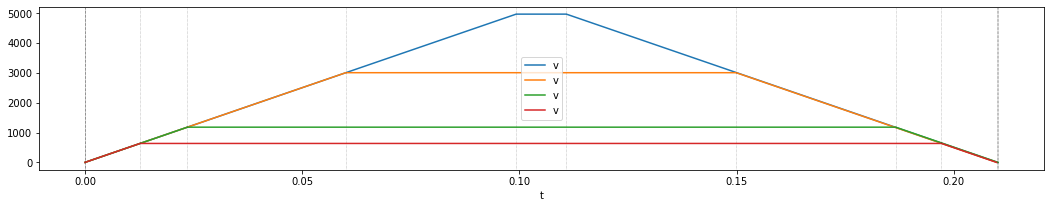

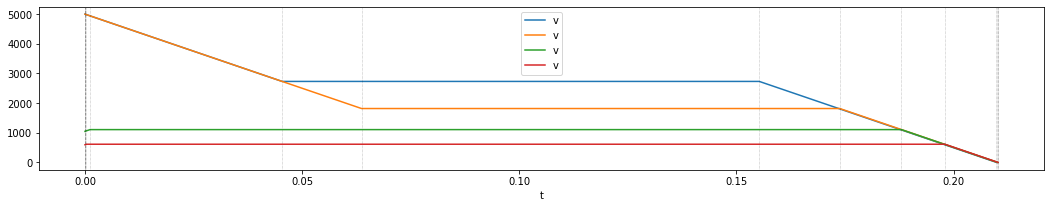

In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
s = Segment(0, [550, 450, 220, 125], joints)
sl[0].plan(v_0=0, v_1=0)
s.plan()
s.plot()
sl[0].plan(v_0=j.v_max, v_1=j.v_max)
s.plot()
s.plan(v_0=j.v_max, v_1=0)
s.plot()


[3, 3, 3, 3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0


Counter({'N': 28, 'VC': 11, 'T1': 1})

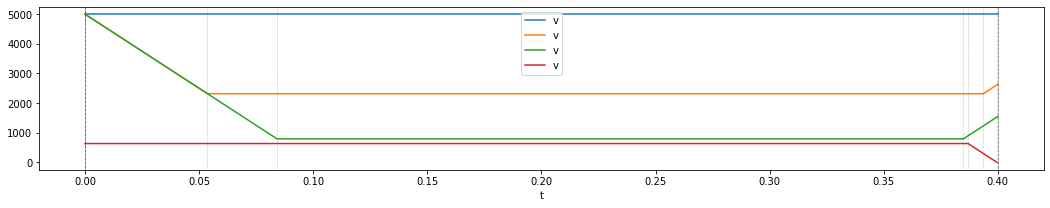

In [98]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

joints = [Joint(5_000, 50_000),Joint(5_000, 50_000),Joint(5_000, 50_000),Joint(5_000, 50_000)]
for i,j in enumerate(joints):
    j.n = int(i)
 
s = Segment(0, [2000,1000,500,250], joints)

s.plan(v_0=j.v_max, v_1=j.v_max)
s.plot()

print(s.dominant)
Counter(chain(*[b.reductions for b in s]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.0010097484835343792, 0.014863384540541218, 3.181980515340684e-05, 0.03858540283578753, 0.0, 5.2325901807817595e-05]


0.2520|[0        245↗   711@4951  ↘44      4482] [0        243↗   753@4935  ↘3       4969]
0.2021|[4482       2↗   895@4453  ↘2       4482] [4969       2↗   908@4996  ↘89      4007]
0.2044|[4482      48↗   831@4998  ↘120     3603] [4007       7↗   785@3913  ↘7       4007]
0.2021|[3603      10↗   676@3460  ↘13      3652] [4007      89↗   902@4996  ↘8       4911]
0.2036|[3652     116↗   884@4997  ↘0       4997] [4911       0↗  1000@4910  ↘0       4911]
0.2501|[4997       0↗   750@4998  ↘249        0] [4911       8↗   742@4998  ↘249        0]

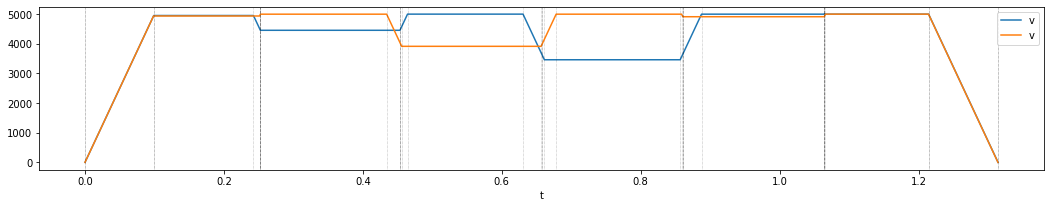

In [99]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint
from trajectory.gsolver import ACDBlock

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,1000])
s = sl.move([900,1000])
s = sl.move([1000,800])
s = sl.move([700,1000])
s = sl.move([1000,1000])
s = sl.move([1000,1000])
sl.plot()
print([s.times_e_rms for  s in sl])
sl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]
[(4, 3), (2, 2), (0, 1)]


<Figure size 432x288 with 0 Axes>

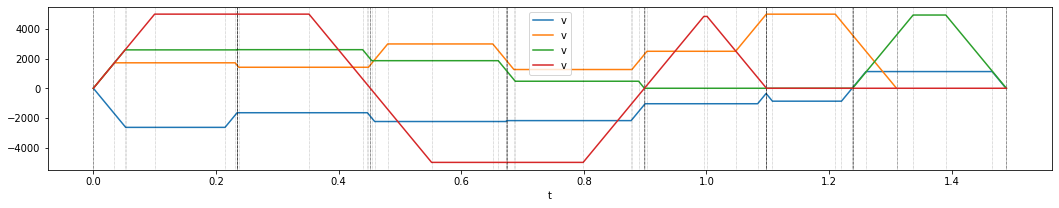

In [53]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([-538, 372, 539, 920])
sl.move([-359, 308, 562, 838])
sl.move([-497, 631, 409, -861])
sl.move([-479, 298, 109, -874])
sl.move([-203, 557, 0, 495])
sl.move([-112, 683, 0, 0])
sl.move([257, 130, 751, 0])


sl.plot()

print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in sl.discontinuities()])

print(Counter(sl.replans).most_common(10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

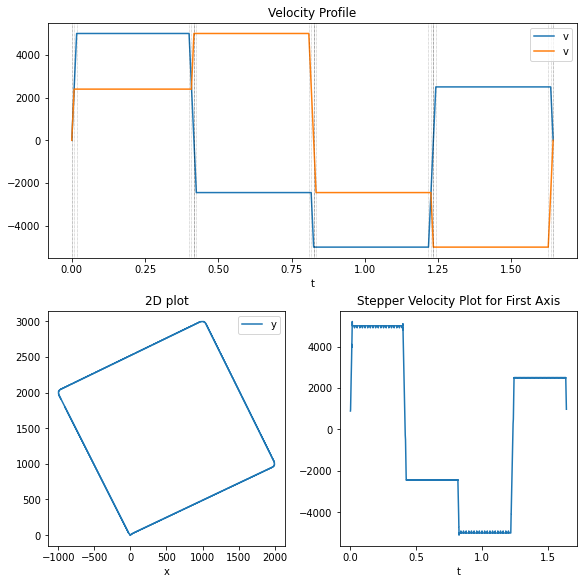

In [55]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py
import matplotlib.pylab as plt
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 300_000)
joints = [j]*2

x=2000
sl = SegmentList(joints)   
sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

stepper_plot(sl)

In [32]:
df = seg_step(sl, details=True)
idx = df.reset_index().groupby(['sg','ph']).t.max()
print(idx)
lt = idx.loc[(0,3)]
df.loc[lt-.00005:lt+.00005].head()

sg  ph
0   1     0.016708
    2     0.400176
    3     0.416980
1   1     0.424936
    2     0.816436
    3     0.824964
2   1     0.824968
    2     1.216632
    3     1.233436
3   1     1.241224
    2     1.632980
    3     1.640984
Name: t, dtype: float64


,s,dr,pt,tf,v,a,sl,pl,sg,ph,dl,dc,xc,xe
t,,,,,,,,,,,,,,
0.416932,0,1,0.016756,0.016803,15.279801,-297500.011905,2,12,0,3,0.065446,0.002646,41.999666,-1.999666
0.416936,0,1,0.016760,0.016803,14.089801,-297500.011905,2,11,0,3,0.070973,0.002650,41.999720,-1.999720
0.416940,0,1,0.016764,0.016803,12.899800,-297500.011905,2,10,0,3,0.077521,0.002654,41.999770,-1.999770
0.416944,0,1,0.016768,0.016803,11.709800,-297500.011905,2,9,0,3,0.085399,0.002658,41.999814,-1.999814
0.416948,0,1,0.016772,0.016803,10.519800,-297500.011905,2,8,0,3,0.095059,0.002662,41.999854,-1.999854


## R=5000 N=200 Tmean = 0.041444848258706465

[0, 3000] [20000, 23000] [ -6 198]


N Discont,0
Replans,"[(6, 197), (4, 2), (0, 1)]"
N Replans,6618
Errors,[]
Reductions,[]


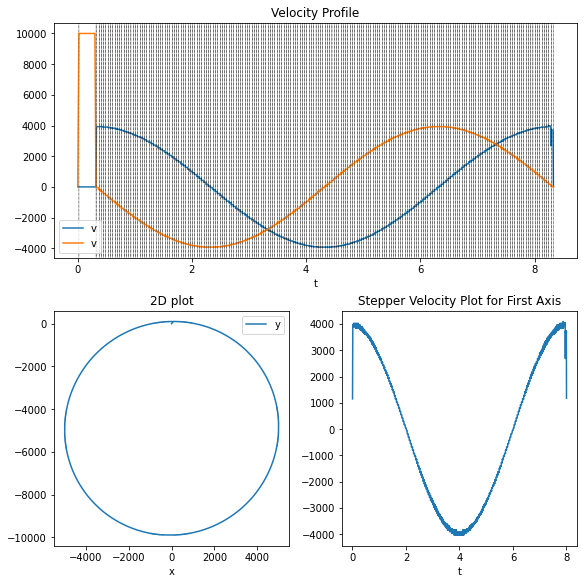

In [77]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.plot import  * 
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

# Acelleration should be about 30x the max velocity

from trajectory.plot import * 
j = Joint(10_000, 500_000)

def make_circle(j, r=5000, n=100):
   
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    lx  = 0
    ly = 2000
    for i in range(0,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 
        
        sl.move((round(x-lx),round(y-ly)))
        
        lx = x
        ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    #sl.plot();plt.show()
    #fig, ax = plt.subplots(1,figsize=(12,12))
    stepper_plot(sl)
    return sl
 
sl = make_circle(j, 5000, 200)
print(sl.move_positions, sl.distance, sl.step_positions)
report(sl)

In [72]:
j

Joint(v_max=10000, a_max=500000, small_x=100.0, max_discontinuity=50.0, max_at=0.02, n=0)

In [71]:
n = 4
m = 4
e = (n-1)+(m-1)

l = [list(bin(i)[2:].zfill(e)) for i in range(2**e)]
l = [ e for e in l if e.count('0') < n and e.count('1') < m ]
l

[['0', '0', '0', '1', '1', '1'],
 ['0', '0', '1', '0', '1', '1'],
 ['0', '0', '1', '1', '0', '1'],
 ['0', '0', '1', '1', '1', '0'],
 ['0', '1', '0', '0', '1', '1'],
 ['0', '1', '0', '1', '0', '1'],
 ['0', '1', '0', '1', '1', '0'],
 ['0', '1', '1', '0', '0', '1'],
 ['0', '1', '1', '0', '1', '0'],
 ['0', '1', '1', '1', '0', '0'],
 ['1', '0', '0', '0', '1', '1'],
 ['1', '0', '0', '1', '0', '1'],
 ['1', '0', '0', '1', '1', '0'],
 ['1', '0', '1', '0', '0', '1'],
 ['1', '0', '1', '0', '1', '0'],
 ['1', '0', '1', '1', '0', '0'],
 ['1', '1', '0', '0', '0', '1'],
 ['1', '1', '0', '0', '1', '0'],
 ['1', '1', '0', '1', '0', '0'],
 ['1', '1', '1', '0', '0', '0']]

In [62]:
bin(5)[2:].zfill(5)

'00101'

In [65]:
['0', '1', '1', '0', '1'].count('1')

3

In [3]:
l='0 [       0   250   100|    5000  4500   900|    250   100     0 ] [       0   250   100|    5000   500   100|    250   100     0 ]'
import re


block_p = re.compile(r'(\[[^\]]*\])')
time_p = re.compile(r'^\s*(\d+)')

def match_segment_line(l, joint):
    from trajectory.gsolver import sign

    t = time_p.match(l)
    
    if not t:
        return None
        
    
    blocks = []
    for g in re.findall(block_p, l):
        estrs = [ e.strip().split() for e in g.strip('[]').split('|')]
    
        (v_0, x_a, t_a), (v_c, x_c, t_c), (x_d, t_d, v_1) = [ list(map(int, e)) for e in estrs]
        
        b = ACDBlock(x_a=x_a, v_0=v_0, t_a=t_a, 
                     x_c=x_c, v_c=v_c, t_c=t_c, 
                     x_d=x_d, v_1=v_1, t_d=t_d )
        
        b.t_a /= 1000
        b.t_c /= 1000
        b.t_d /= 1000
        
        b.x = b.x_a + b.x_c + b.x_d
        b.d = sign(b.x)
        b.t = b.t_a + b.t_c + b.t_d
        
        blocks.append(b)
        
    joints = [j]*len(blocks)
        
    return Segment(0, blocks, joints)
        

match_segment_line(l, Joint(5_000, 50_000))

1.1000|[0        250↗  4500@5000  ↘250        0] [0        250↗   500@5000  ↘250        0]

In [4]:
l='[{"d":1.0,"t":1.6358410194200026,"t_a":0.06360755101287481,"t_c":1.508625917394253,"t_d":0.06360755101287481,"v_0":5000.0,"v_1":3180.0,"v_c":3180.3775506437405,"x":5000.0,"x_a":101.14801364638679,"x_c":4798.0,"x_d":101.14801364638679},{"d":1.0,"t":1.6122528076381824,"t_a":0.012512379693569305,"t_c":1.5872280482510437,"t_d":0.012512379693569305,"v_0":5000.0,"v_1":625.0,"v_c":625.6189846784653,"x":1000.0,"x_a":3.9139911399011376,"x_c":993.0,"x_d":3.9139911399011376}]'
import json

json.loads(l)

[{'d': 1.0,
  't': 1.6358410194200026,
  't_a': 0.06360755101287481,
  't_c': 1.508625917394253,
  't_d': 0.06360755101287481,
  'v_0': 5000.0,
  'v_1': 3180.0,
  'v_c': 3180.3775506437405,
  'x': 5000.0,
  'x_a': 101.14801364638679,
  'x_c': 4798.0,
  'x_d': 101.14801364638679},
 {'d': 1.0,
  't': 1.6122528076381824,
  't_a': 0.012512379693569305,
  't_c': 1.5872280482510437,
  't_d': 0.012512379693569305,
  'v_0': 5000.0,
  'v_1': 625.0,
  'v_c': 625.6189846784653,
  'x': 1000.0,
  'x_a': 3.9139911399011376,
  'x_c': 993.0,
  'x_d': 3.9139911399011376}]

In [ ]:
delay = (-v_0 - sqrt(2*a_max + v_0**2))/a_max



In [2]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.stepper import * 

s = Stepper()
s.load_phases( [ ( 10,500,2000),  (10,2000,500),  ( 10,500,2000) ] )

l=list(s)

df = pd.DataFrame(s.s)
df['stp'] = 1
df['stp'] = df['stp'].cumsum()

df['t_n'] = df.t_n+df.t0
df.set_index('t_n').stp.plot()


AttributeError: 'Stepper' object has no attribute 's'

<AxesSubplot:xlabel='t'>

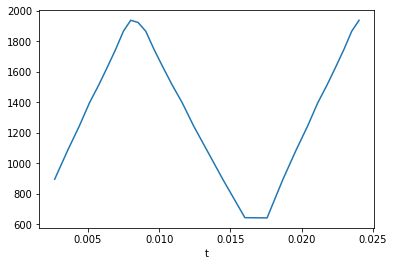

In [15]:
df['td'] = df.t.diff()
df['v'] = 1/df.td
df.set_index('t').v.plot()

In [3]:
from trajectory.planner import Joint, SegmentList, Segment
from trajectory.stepper import * 

s = Segment(  0,  [Joint(5_000, 50_000)]*3, [1000,400,10])
s.plan()
sb = s.stepper_blocks
steppers = [Stepper().load_phases(sb) for sb in s.stepper_blocks]
print([sb for sb in s.stepper_blocks])
l = [list(s) for s in steppers]
z = list(map(len, l))
z, z[0]/z[2]


[((250, 0, 4997), (501, 4997, 4997), (250, 4997, 0)), ((22, 0, 1480), (356, 1480, 1480), (22, 1480, 0)), ((0, 0, 33), (10, 33, 33), (0, 33, 0))]


([75102, 75010, 75993], 0.9882752358769886)

In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py


from trajectory.planner import Joint, SegmentList, Segment
from trajectory.stepper import * 

s = Stepper().load_phases(((0, 0, 33), (10, 33, 33), (0, 33, 0)))
print(s.iter, s.steps_left, s.phases_left)
l = list(s)


0 0 3
HERE!
HERE!
HERE!


In [23]:
s.steps_left <= 0, s.phases_left != 0, s.t

(True, True, 0.4000000000003174)

In [90]:
[ s.t for s in steppers ]

[0.3004040000002178, 0.3000360000002174, 0.30396800000022134]

In [91]:
step, vi, vf = 100, 499, 501
t = 2 * x / (vi + vf)
a = (vf - vi) / t if t != 0 else 0
abs((-vi + sqrt(2 * a * step +vi ** 2)) / a)

0.2